In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
wine_data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Major and Minore projects\Red wine.csv')
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:

wine_data.shape

(1599, 12)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [7]:
wine_data[wine_data['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [8]:
wine_data[wine_data['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [9]:
wine_data[wine_data['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [10]:

wine_data= wine_data.dropna()

In [11]:
wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
#Chainging the type into integer
wine_data['quality'] =wine_data['quality'].astype('int')

In [13]:
wine_data['quality'].unique().sort

<function ndarray.sort>

In [14]:
pred_test =wine_data.iloc[3]

In [15]:
pred_test['type'] = 1
pred_test.drop(['quality','total sulfur dioxide'],inplace = True)
pred_test

fixed acidity          11.200
volatile acidity        0.280
citric acid             0.560
residual sugar          1.900
chlorides               0.075
free sulfur dioxide    17.000
density                 0.998
pH                      3.160
sulphates               0.580
alcohol                 9.800
type                    1.000
Name: 3, dtype: float64

In [16]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


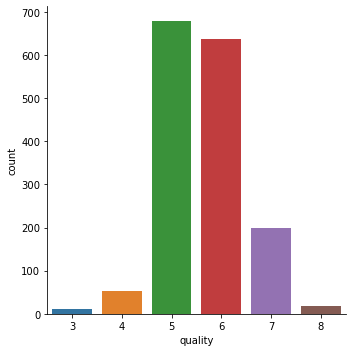

In [17]:
sns.catplot(x='quality', data = wine_data, kind = 'count')

<AxesSubplot:>

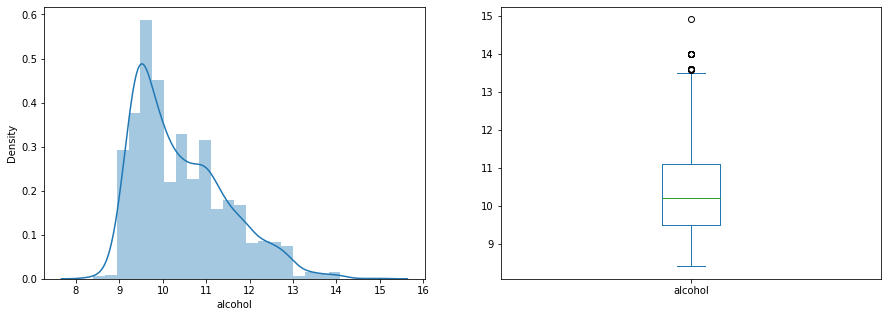

In [18]:
#Checking distribution and outlier for each variables

plt.figure(2)
plt.subplot(121)
sns.distplot(wine_data['alcohol'])
plt.subplot(122)
wine_data['alcohol'].plot.box(figsize = (15,5))

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

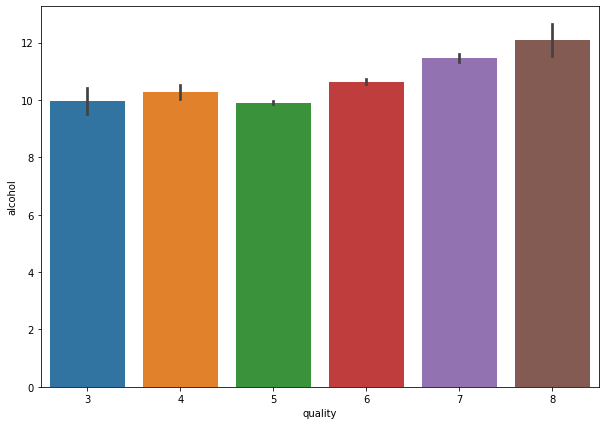

In [19]:
#bivariate analysis to check quality with all the other variable
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'alcohol', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

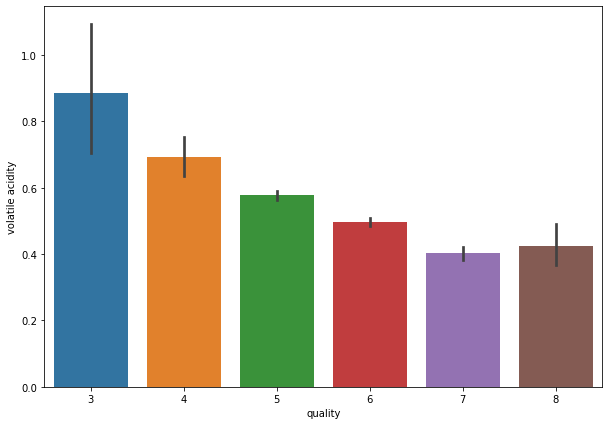

In [20]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'volatile acidity', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

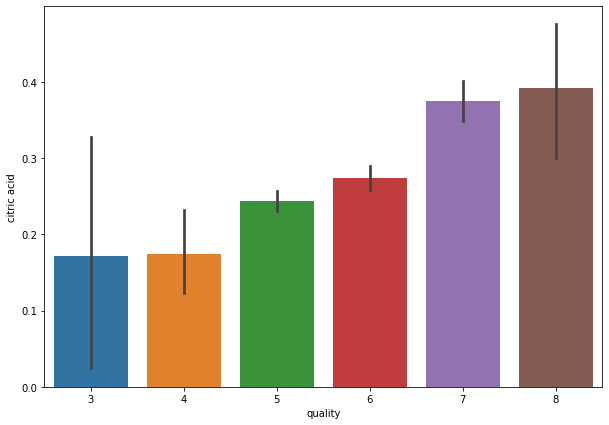

In [21]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'citric acid', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

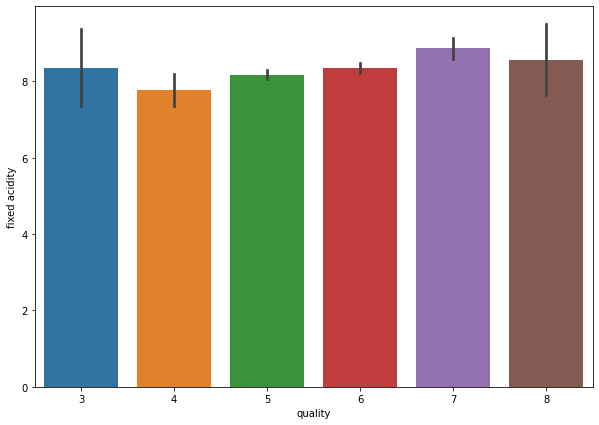

In [22]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'fixed acidity', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

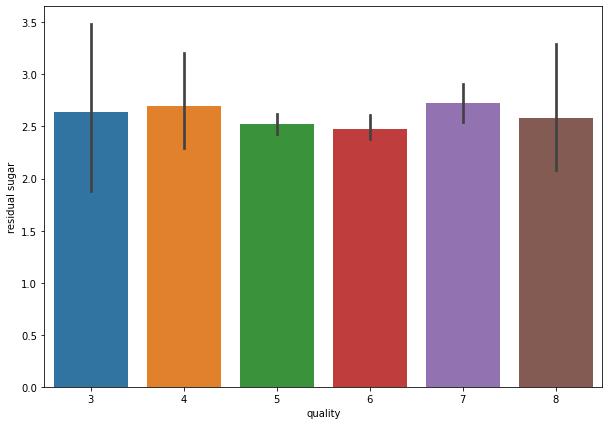

In [23]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'residual sugar', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

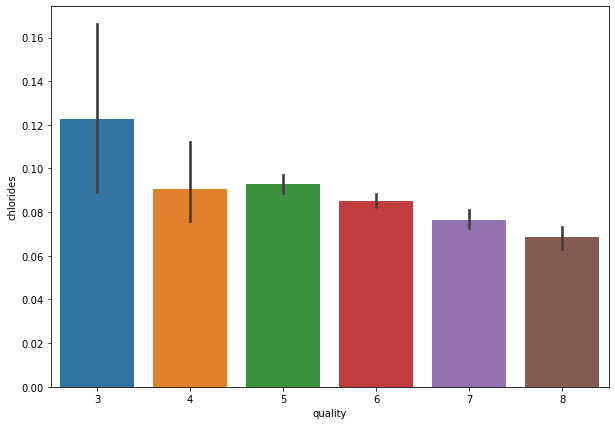

In [24]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'chlorides', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

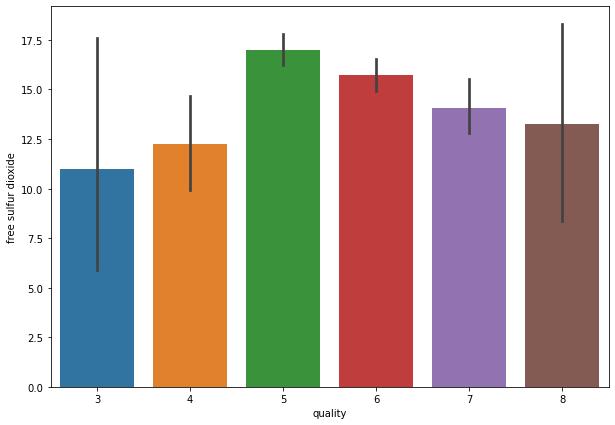

In [25]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'free sulfur dioxide', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

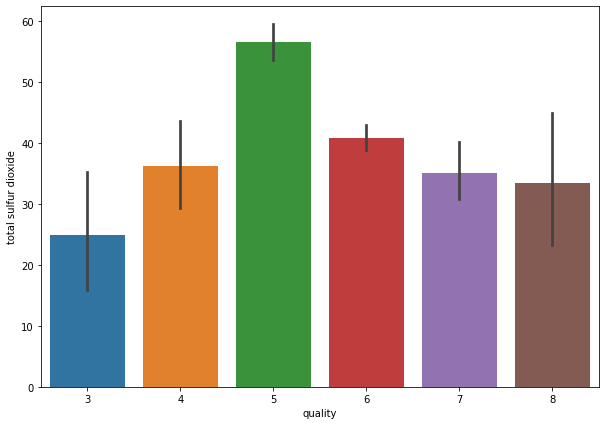

In [26]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'total sulfur dioxide', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='density'>

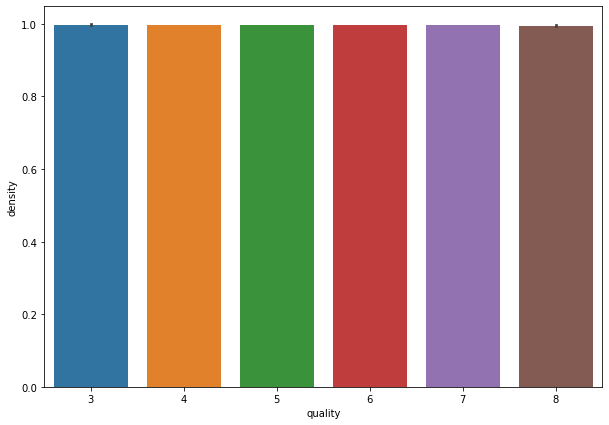

In [27]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'density', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

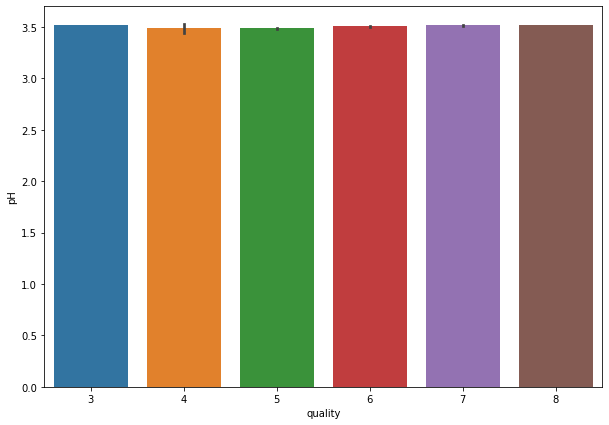

In [28]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'pH', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

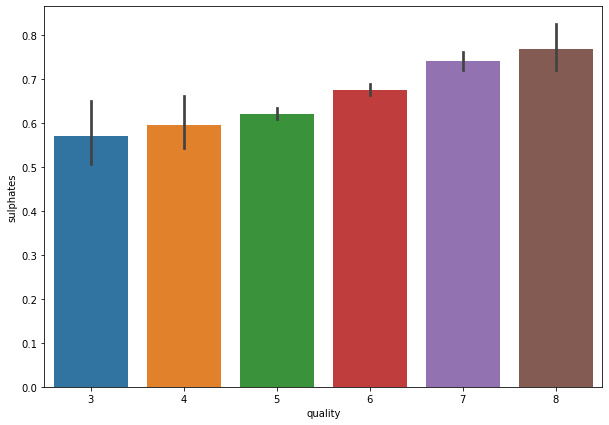

In [29]:
plt.figure(figsize =(10,7))
sns.barplot(x = 'quality' , y = 'sulphates', data = wine_data)

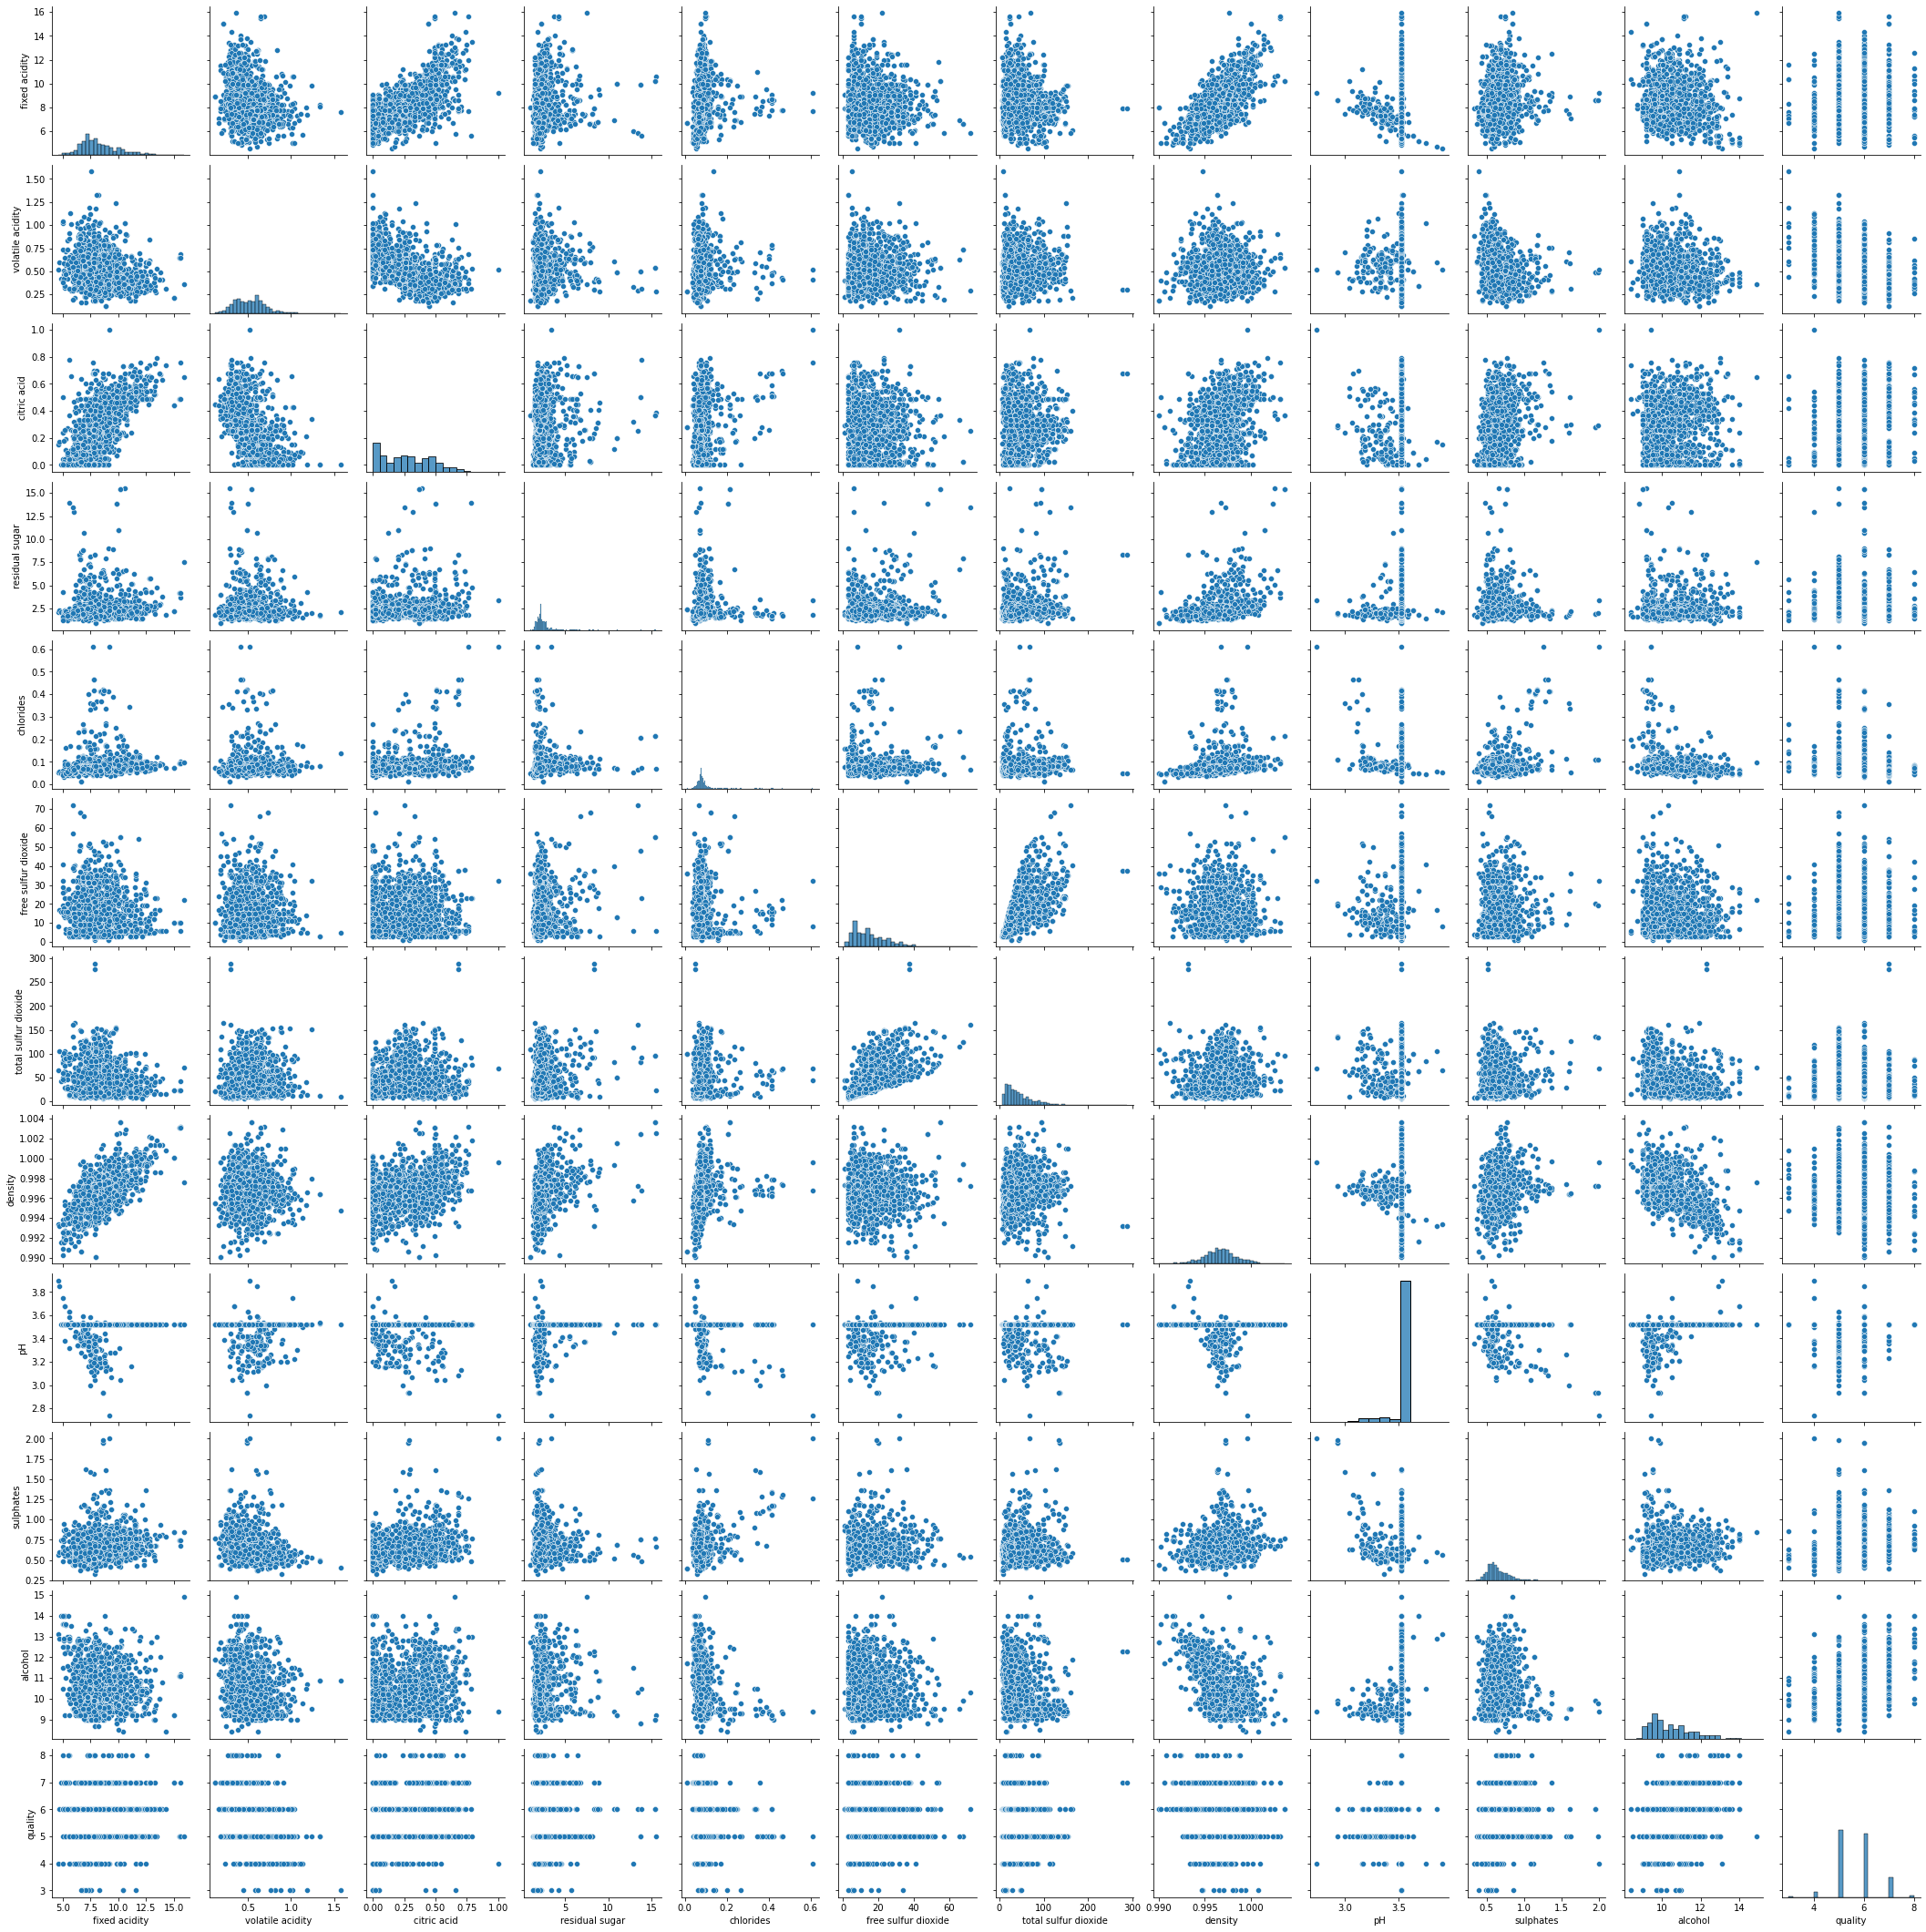

In [30]:
#ploting all variables for there distribution and relation

sns.pairplot(wine_data)

In [31]:
#Checking correlation
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


<AxesSubplot:>

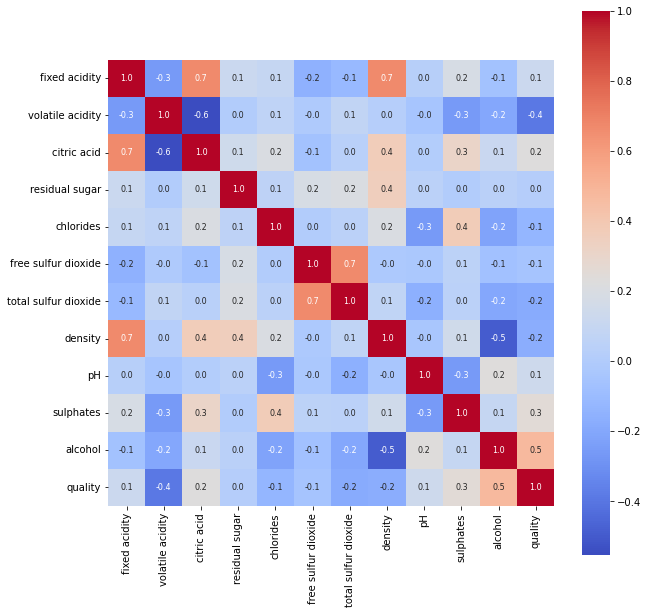

In [32]:
#building heatmap

plt.figure(figsize = (10,10))
sns.heatmap(wine_data.corr(), cbar = True, square = True, fmt ='.1f', annot = True, annot_kws ={'size':8}, cmap = 'coolwarm')

In [33]:
#DAta Preprocessing

#separate the data and label

#X = wine_data.drop('quality', axis = 1)
#X

In [34]:
#label Binarization

Y = wine_data['quality'].apply(lambda y:1 if y>7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1596, dtype: int64

In [35]:
#Train test split

In [36]:
#Convert catagorical values to dummies

wine_ml = pd.get_dummies(wine_data, drop_first = True)
wine_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
wine_ml.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [38]:
wine_ml.dropna(inplace = True)
X = wine_ml.drop('quality',axis=1)

X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [39]:
#Model training

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score


In [40]:
X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size = 0.2, random_state = 3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1596,) (1276,) (320,)


In [41]:
model = RandomForestClassifier()


In [42]:

model.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
#Model Evaluation

#Accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [44]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.984375


In [45]:
#Building a predictive system  

input_data = (5.2,0.48,0.04,1.6,0.054,19,106,0.9927,3.52,0.62,12.2)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the data as we are predicting the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1
                                                       )
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
    print('Yeah Good Quality Wine')
else:
    print('nahhh not a Good Quality Wine ')

[0]
nahhh not a Good Quality Wine 


In [49]:
X_test.iloc[235][:] 

fixed acidity            8.60000
volatile acidity         0.68500
citric acid              0.10000
residual sugar           1.60000
chlorides                0.09200
free sulfur dioxide      3.00000
total sulfur dioxide    12.00000
density                  0.99745
pH                       3.52000
sulphates                0.65000
alcohol                  9.55000
Name: 1395, dtype: float64